<a href="https://colab.research.google.com/github/Javeriatabraiz/Javeriatabraiz/blob/main/Assignment3_NN_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Javeria Tabraiz
#FA21-RCE-001
#Neural Network and Fuzzy Systems Assignment 3

# **PART 1 - Auto Encoder : Linear model**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.ToTensor()
# transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5),(0.5)) 
# ]) #makes data [-1,1] in that case we use tanh activation
mnist_data = datasets.MNIST(root = './data',train = True, download = True, transform = transform)
data_loader = torch.utils.data.DataLoader(dataset = mnist_data, batch_size = 64,shuffle = True)

In [ ]:
#inspecting the first batch to analyse the data
dataiter = iter(data_loader)
images, labels = next(dataiter)

#printing min and max values of the images
print(torch.min(images),torch.max(images))

tensor(0.) tensor(1.)


In [ ]:
from torch.nn.modules.activation import ReLU
class AutoEncoder_Linear(nn.Module):
    def __init__(self):
      #N(batch_size),784(no of pixels in image) - 28*28
      #reducing the width - encode
      super().__init__()
      self.encoder = nn.Sequential(
          nn.Linear(28*28,128), #N, 784 will be reduced to N, 128
          nn.ReLU(), #activation function
          nn.Linear(128,64),
          nn.ReLU(),
          nn.Linear(64,12),
          nn.ReLU(),
          nn.Linear(12,3), #final size N=3
      )

          
          
        
      self.decoder = nn.Sequential(
          nn.Linear(3,12), #N, 3 will be reduced to N, 784
          nn.ReLU(), #activation function
          nn.Linear(12,64),
          nn.ReLU(),
          nn.Linear(64,128),
          nn.ReLU(),
          nn.Linear(128,28*28), #final size N=3
          #data values between 0-1 so choose a revelent activation
          nn.Sigmoid() #here if the tensor values were between [-1,1] then we should've used nn.Tanh()
    


      )
        

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded   



In [ ]:
model = AutoEncoder_Linear()
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.001, weight_decay =  1e-8)


In [ ]:
num_epochs = 30
outputs = [ ]
for epoch in range(num_epochs): #defining the training loop
  for (img , _) in data_loader:
    img = img.reshape(-1,28*28) #reshaping because images the images are in shape 28,28 and we want in 784
    recon = model(img)
    loss = criterion(recon,img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
  outputs.append((epoch,img,recon)
  )

Epoch:1,Loss:0.0468
Epoch:2,Loss:0.0401
Epoch:3,Loss:0.0395
Epoch:4,Loss:0.0351
Epoch:5,Loss:0.0361
Epoch:6,Loss:0.0380
Epoch:7,Loss:0.0328
Epoch:8,Loss:0.0353
Epoch:9,Loss:0.0354
Epoch:10,Loss:0.0327
Epoch:11,Loss:0.0319
Epoch:12,Loss:0.0340
Epoch:13,Loss:0.0338
Epoch:14,Loss:0.0330
Epoch:15,Loss:0.0270
Epoch:16,Loss:0.0307
Epoch:17,Loss:0.0306
Epoch:18,Loss:0.0339
Epoch:19,Loss:0.0295
Epoch:20,Loss:0.0282
Epoch:21,Loss:0.0294
Epoch:22,Loss:0.0286
Epoch:23,Loss:0.0292
Epoch:24,Loss:0.0314
Epoch:25,Loss:0.0282
Epoch:26,Loss:0.0302
Epoch:27,Loss:0.0292
Epoch:28,Loss:0.0316
Epoch:29,Loss:0.0279
Epoch:30,Loss:0.0296


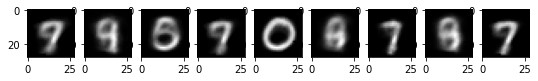

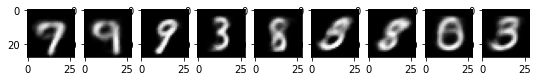

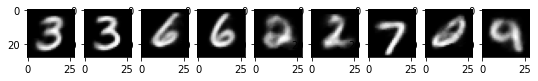

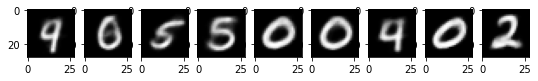

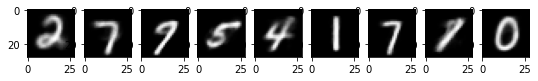

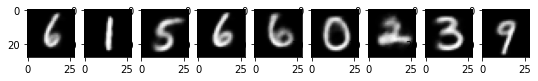

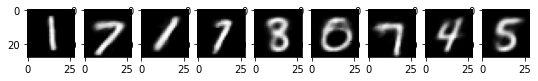

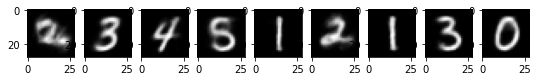

In [ ]:
for k in range(0,num_epochs,4):
  plt.figure(figsize = (9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy() #numpy conversion from tensor for plotting
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 0 : break
    plt.subplot(2,9,9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])
  for i, item in enumerate(recon):
    if i >= 9 : break
    plt.subplot(2,9,9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

# **Part 2 - Auto Encoder : Convolution model**

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        # n will be 1, 28, 28 #ip, op, kernel, stride, padding
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # -> N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7) # -> N, 64, 1, 1
        )
        
       #switching the sizes, ip size will be op size #ip, op, kernel
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), # -> N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
model = Autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

In [ ]:

num_epochs = 30
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0051
Epoch:2, Loss:0.0045
Epoch:3, Loss:0.0036
Epoch:4, Loss:0.0027
Epoch:5, Loss:0.0033
Epoch:6, Loss:0.0027
Epoch:7, Loss:0.0028
Epoch:8, Loss:0.0024
Epoch:9, Loss:0.0029
Epoch:10, Loss:0.0028
Epoch:11, Loss:0.0029
Epoch:12, Loss:0.0027
Epoch:13, Loss:0.0024
Epoch:14, Loss:0.0027
Epoch:15, Loss:0.0028
Epoch:16, Loss:0.0033
Epoch:17, Loss:0.0024
Epoch:18, Loss:0.0026
Epoch:19, Loss:0.0024
Epoch:20, Loss:0.0027
Epoch:21, Loss:0.0024
Epoch:22, Loss:0.0026
Epoch:23, Loss:0.0024
Epoch:24, Loss:0.0024
Epoch:25, Loss:0.0024
Epoch:26, Loss:0.0025
Epoch:27, Loss:0.0030
Epoch:28, Loss:0.0029
Epoch:29, Loss:0.0023
Epoch:30, Loss:0.0026


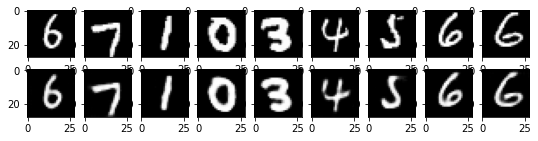

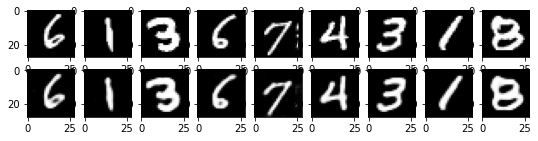

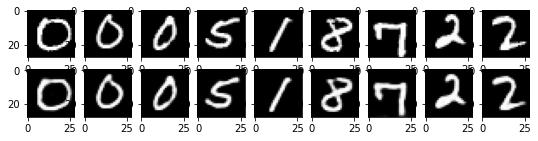

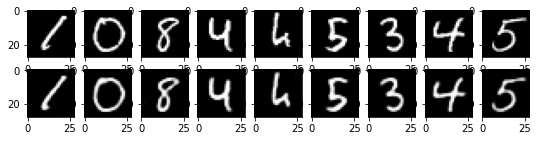

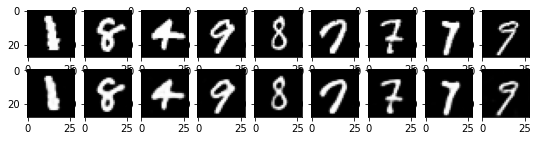

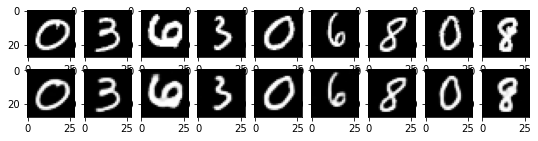

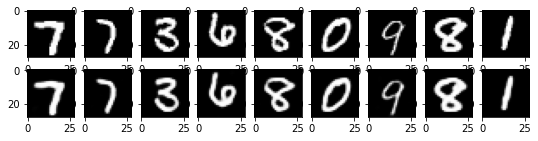

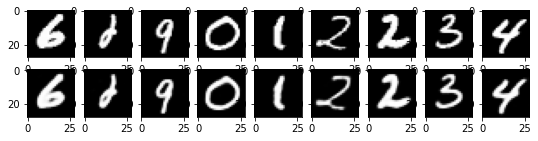

In [ ]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])